In [128]:
library(tidyverse)
library(ggplot2)
library(ggrepel)
library(dplyr)

Warning message:
“package ‘ggrepel’ was built under R version 4.2.2”


In [3]:
racers = readr::read_csv('https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2020/2020-04-07/tdf_winners.csv')

Rows: 106 Columns: 19
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (7): winner_name, winner_team, full_name, nickname, birth_town, birth_c...
dbl  (9): edition, distance, time_overall, time_margin, stage_wins, stages_l...
date (3): start_date, born, died

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
racers |> head()

edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,weight,age,born,died,full_name,nickname,birth_town,birth_country,nationality
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1903-07-01,Maurice Garin,La Française,2428,94.55389,2.989167,3,6,1.62,60,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,France
2,1904-07-02,Henri Cornet,Conte,2428,96.09861,2.270556,1,3,NA,NA,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,France
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994,NA,NA,5,10,NA,NA,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,France
4,1906-07-04,René Pottier,Peugeot–Wolber,4637,NA,NA,5,12,NA,NA,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,France
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488,NA,NA,2,5,NA,NA,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France
6,1908-07-13,Lucien Petit-Breton,Peugeot–Wolber,4497,NA,NA,5,13,NA,NA,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France


In [178]:
racers |> summarise(min = min(start_date), max = max(start_date))

min,max
<date>,<date>
1903-07-01,2019-07-06


In [6]:
racers$birth_country |> table()


  Australia     Belgium    Columbia     Denmark      France     Germany 
          1          19           1           1          36           1 
    Ireland       Italy       Kenya  Luxembourg Netherlands       Spain 
          1          11           4           4           2          12 
Switzerland         USA       Wales 
          2          10           1 

In [7]:
country_sorted = racers |> 
    pull(birth_country) |> 
    fct_infreq() |> fct_lump(n = 6) |> fct_rev()

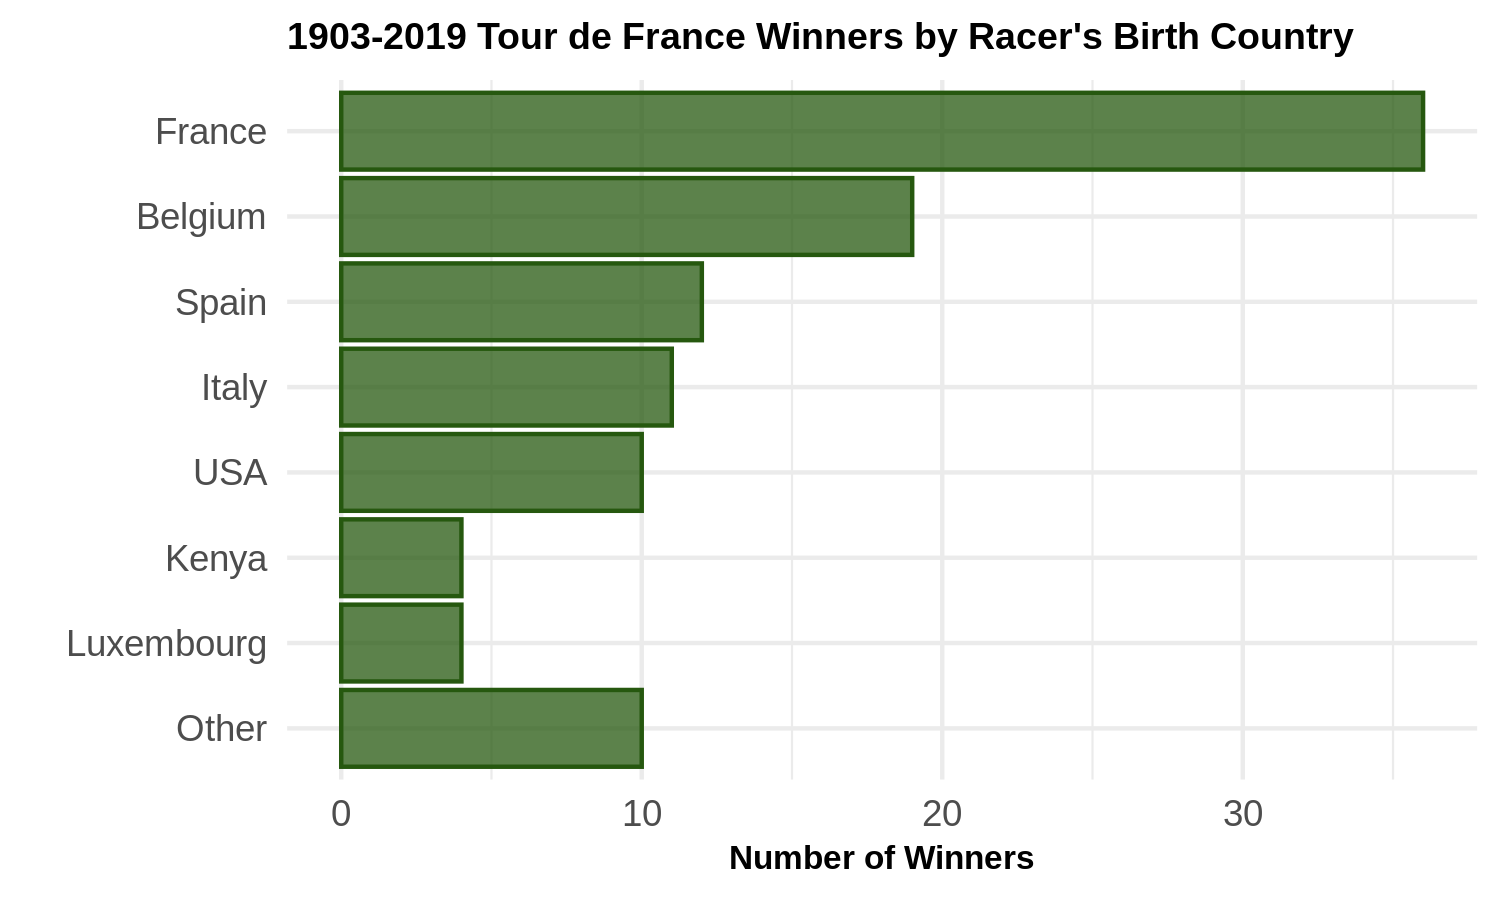

In [157]:
options(repr.plot.height = 3, repr.plot.width = 5)
p_bthcnty = ggplot(racers, aes(y = country_sorted)) + geom_bar(alpha = 0.75, color = '#26580F', fill = '#26580F') + 
    theme_minimal() + theme(plot.title = element_text(size = 9, face ='bold'), axis.title = element_text(size=8, face = 'bold')) +
    labs(x = 'Number of Winners', y = '') + 
    labs(title = "1903-2019 Tour de France Winners by Racer's Birth Country")
    

p_bthcnty

In [67]:
racers_sorted2 = racers |> mutate(country_sorted2 = birth_country |> factor() |> fct_reorder(time_overall, median, na.rm=T) |> fct_lump(n = 6))

In [78]:
racers_med_time = racers_sorted2 |> 
    group_by(country_sorted2) |> 
    summarise(time_overall = median(time_overall, na.rm = T))

racers_med_time |> print()

# A tibble: 8 × 2
  country_sorted2 time_overall
  <fct>                  <dbl>
1 Kenya                   85.6
2 USA                     87.0
3 Spain                   94.4
4 France                 124. 
5 Belgium                142. 
6 Italy                  147. 
7 Luxembourg             155. 
8 Other                  105. 


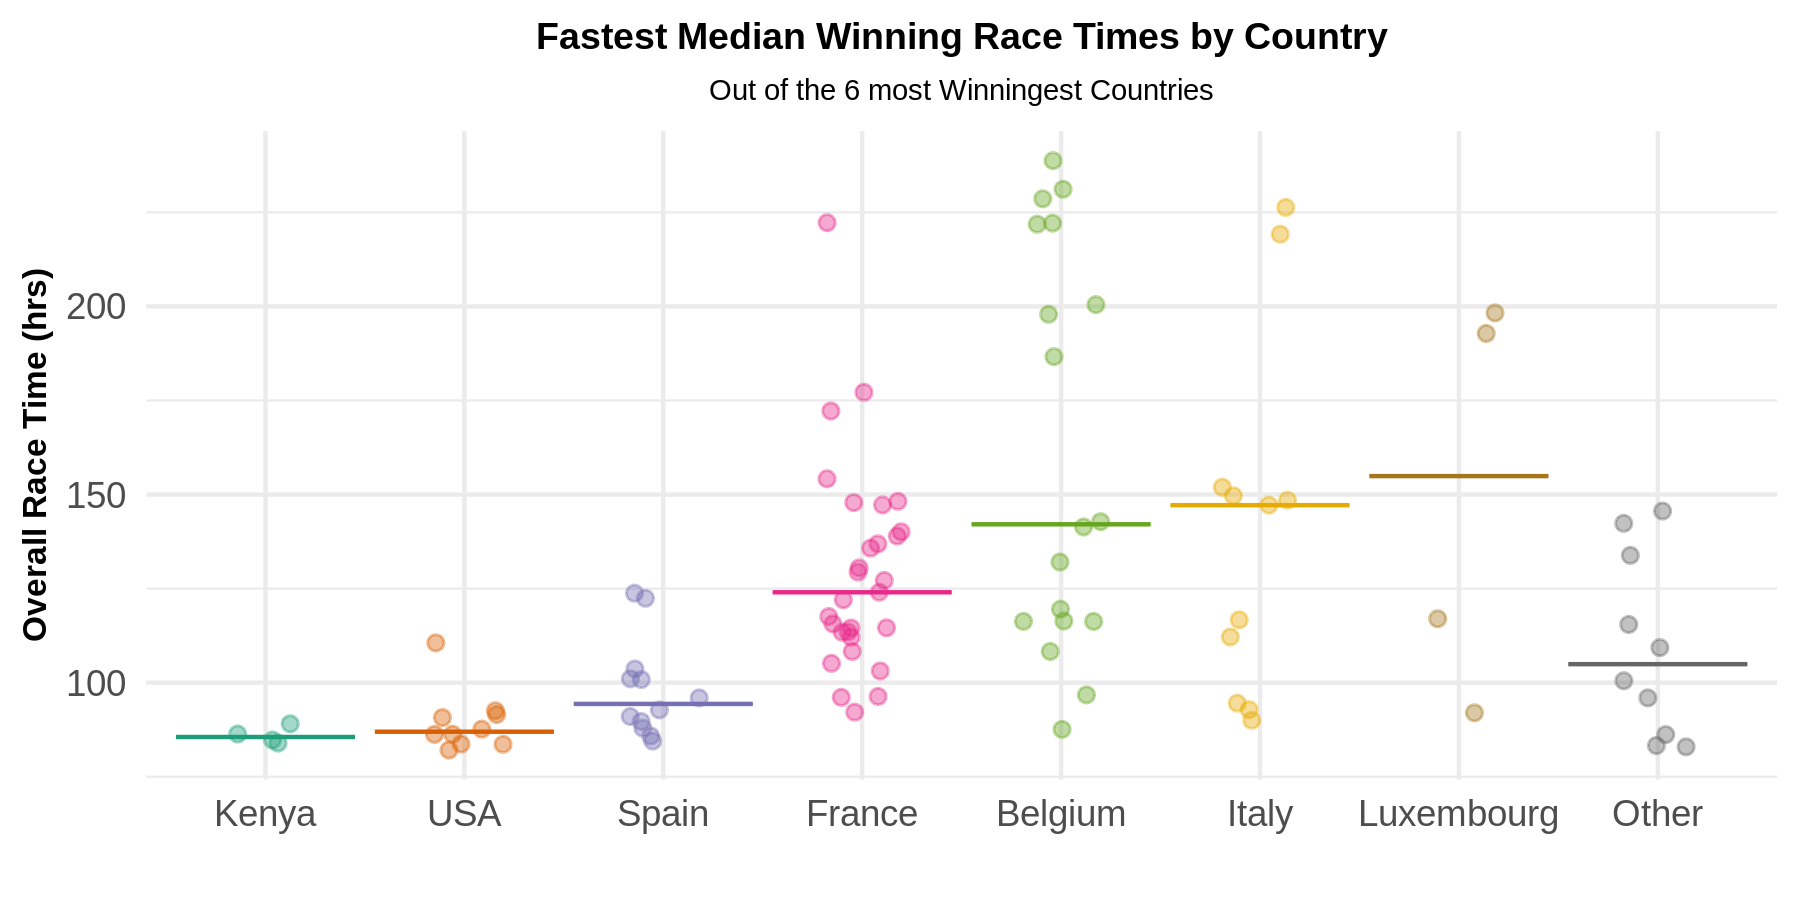

In [158]:
options(repr.plot.height = 3, repr.plot.width = 6)
p_time = ggplot(racers_sorted2, aes(x = country_sorted2, y = time_overall, color = country_sorted2)) + 
    geom_point(na.rm=T, alpha = .4, position = position_jitter(w = .2), show.legend = FALSE) + 
    geom_crossbar(data = racers_med_time, aes(ymin = time_overall, ymax = time_overall), fatten = .3, show.legend = FALSE) +
    theme_minimal() + theme(plot.title = element_text(size = 9, face ='bold', hjust = 0.5), 
            plot.subtitle = element_text(size = 7, hjust = 0.5), axis.title = element_text(size=8, face = 'bold')) +
    scale_color_brewer(palette = 'Dark2') +
    labs(x = '', y = 'Overall Race Time (hrs)') + 
    labs(title = "Fastest Median Winning Race Times by Country", subtitle = "Out of the 6 most Winningest Countries")

p_time

In [88]:
racers_speed = racers_sorted2 |> mutate(speed = distance/time_overall) #Speed in KM/hr

racers_speed |> head()

edition,start_date,winner_name,winner_team,distance,time_overall,time_margin,stage_wins,stages_led,height,⋯,age,born,died,full_name,nickname,birth_town,birth_country,nationality,country_sorted2,speed
<dbl>,<date>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<date>,<date>,<chr>,<chr>,<chr>,<chr>,<chr>,<fct>,<dbl>
1,1903-07-01,Maurice Garin,La Française,2428,94.55389,2.989167,3,6,1.62,⋯,32,1871-03-03,1957-02-19,NA,The Little Chimney-sweep,Arvier,Italy,France,Italy,25.67848
2,1904-07-02,Henri Cornet,Conte,2428,96.09861,2.270556,1,3,NA,⋯,19,1884-08-04,1941-03-18,NA,Le rigolo (The joker),Desvres,France,France,France,25.26571
3,1905-07-09,Louis Trousselier,Peugeot–Wolber,2994,NA,NA,5,10,NA,⋯,24,1881-06-29,1939-04-24,NA,Levaloy / Trou-trou,Paris,France,France,France,NA
4,1906-07-04,René Pottier,Peugeot–Wolber,4637,NA,NA,5,12,NA,⋯,27,1879-06-05,1907-01-25,NA,NA,Moret-sur-Loing,France,France,France,NA
5,1907-07-08,Lucien Petit-Breton,Peugeot–Wolber,4488,NA,NA,2,5,NA,⋯,24,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,France,NA
6,1908-07-13,Lucien Petit-Breton,Peugeot–Wolber,4497,NA,NA,5,13,NA,⋯,25,1882-10-18,1917-12-20,Lucien Georges Mazan,Lucien Petit-Breton,Plessé,France,France,France,NA


In [151]:
fastest_racer = racers_speed |> select(birth_country, speed, start_date, winner_name) |> arrange(desc(speed)) |> head(1)

fastest_racer |> head()

birth_country,speed,start_date,winner_name
<chr>,<dbl>,<date>,<chr>
Italy,41.74322,1998-07-11,Marco Pantani


`geom_smooth()` using method = 'loess' and formula = 'y ~ x'


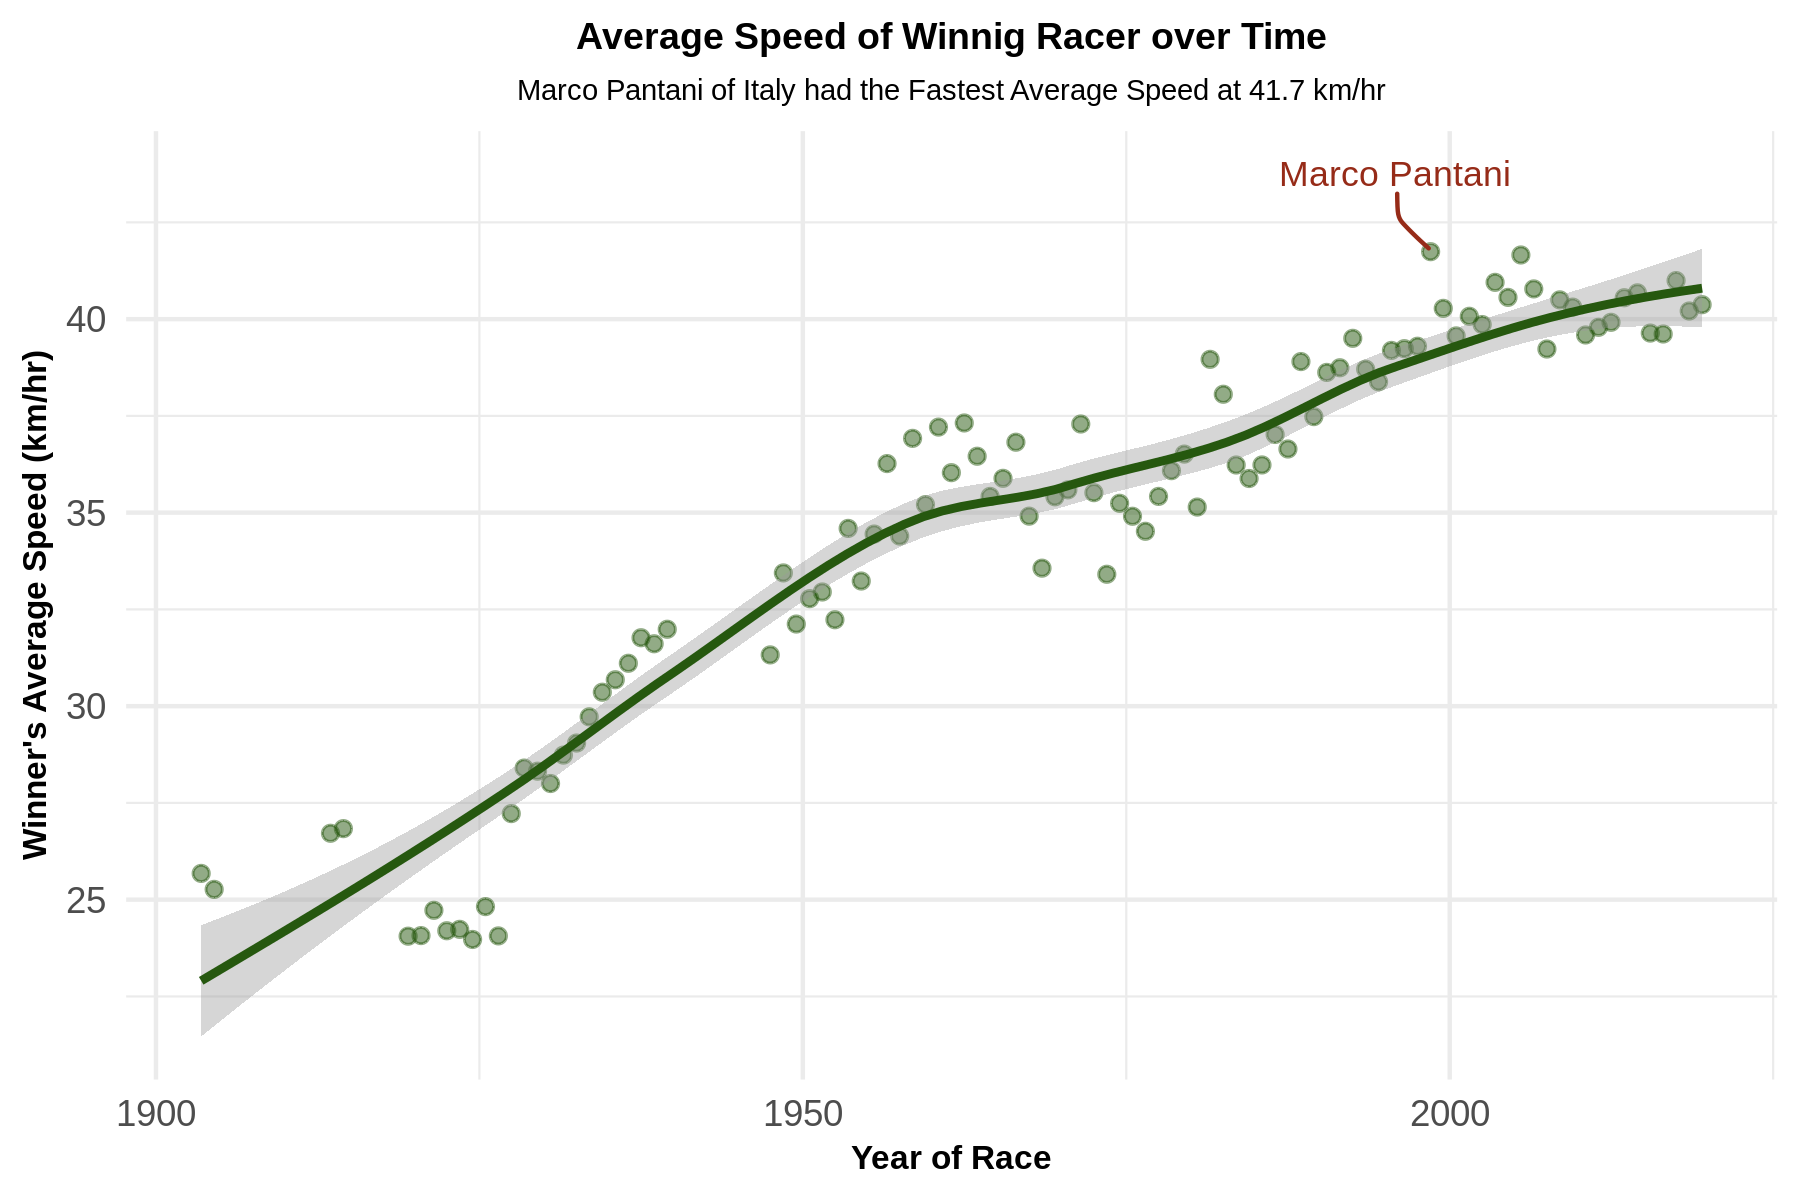

In [177]:
options(repr.plot.height = 4, repr.plot.width = 6)
p_speed = ggplot(racers_speed, aes(x = start_date, y = speed)) + geom_point(color = '#26580F', alpha = .5, na.rm=T) + 
        geom_smooth(color = '#26580F', na.rm=T) +
        theme_minimal() + theme(plot.title = element_text(size = 9, face ='bold', hjust = 0.5), 
            plot.subtitle = element_text(size = 7, hjust = 0.5), axis.title = element_text(size=8, face = 'bold')) +
        labs(x = 'Year of Race', y = "Winner's Average Speed (km/hr)") + 
        labs(title = "Average Speed of Winnig Racer over Time", subtitle = "Marco Pantani of Italy had the Fastest Average Speed at 41.7 km/hr") +
        geom_text_repel(data = fastest_racer, 
            color = '#962b18', 
            aes(label =winner_name),
            nudge_x = -1000,
            nudge_y = 2,
            size = 3,
            segment.curvature = 0.1,
            segment.ncp = 3,
            segment.angle = 20)

p_speed

To start my analysis, I wanted to look at which countries produced the most Tour de France (tdf) winners. To do so, I had to look at the variable “birth_country” in a table, to see which countries had the highest frequencies. I then converted birth_country into a factor,  sorted by frequency of country, and then lumped the low frequency countries into a “other” category. This left me with the 6 countries with the most Tour de France winners. I then plotted them as a bar chart, sorted by frequency, which shows that France clearly had the most tdf winners, with a total of  36 winners between 1903 and 2019. France was followed by Belgium, with 19 winners, and Spain, with 12 winners.

Next, I wanted to see how the median race times compared between the 6 countries with the most winners. My first step in this process was to reorder the birth_country factor so that it was in order of median race time instead of frequency, and I called this new factor “country_sorted2”. I used this new country factor to plot the individual winner’s race times by country, sorted in order by median race time. I also wanted to show what each country's median race time was on the plot, so I had to create a new data frame where I grouped by country and calculated the median race time as a new variable. I then plotted the median race time variable as a geom_crossbar in my plot to show the y position of each country's median race time. This analysis showed Kenya had the fastest median race time at 85.6 hours, followed by USA and Spain.

Lastly, I wanted to see how the average speed of the tdf winners has changed over time. I first needed to calculate the average speed, as this was not already a variable in the dataset. I did this by dividing the racers distance by their overall race time to get their avg. speed in km/hr. I also wanted to highlight the winner with the fastest avg. speed, so I used dplyr to create a data frame containing the racer with the fastest speed’s name, country, speed, and date of race. I plotted the individual speeds of each winner as a function of the date of their race, and added a geom_smooth trend line to show that the avg. speed is increasing over time. I then used ggrepel to plot the name of the fastest racer next to the point corresponding to their avg speed.